## Loan Approval Status prediction Using SVM

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('../Datasets/loan_status_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
df.Gender=pd.factorize(df.Gender)[0]

In [8]:
df.Gender

1      0
2      0
3      0
4      0
5      0
      ..
609    1
610    0
611    0
612    0
613    1
Name: Gender, Length: 480, dtype: int64

In [9]:
df.Married=pd.factorize(df.Married)[0]
df.Education=pd.factorize(df.Education)[0]
df.Self_Employed=pd.factorize(df.Self_Employed)[0]
df.Property_Area=pd.factorize(df.Property_Area)[0]
df.Loan_Status=pd.factorize(df.Loan_Status)[0]

In [10]:
df.Dependents.value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [11]:
df=df.replace(to_replace='3+',value=4)

In [12]:
df.Dependents.value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

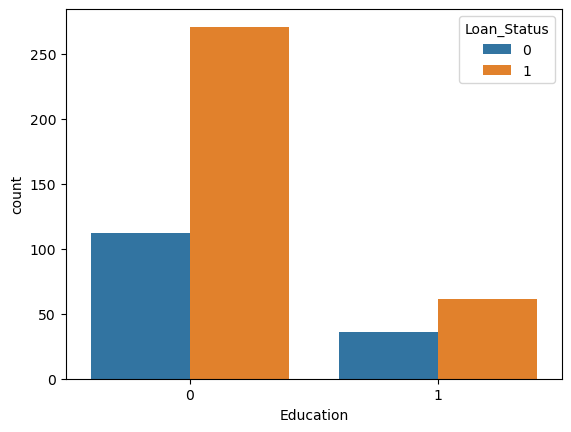

In [13]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

In [14]:
X=df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=df.Loan_Status

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
model=SVC(kernel='linear')
model.fit(X_train,Y_train)

In [ ]:
predicted_y_train=model.predict(X_train)
accuracy_score(Y_train,predicted_y_train)

In [ ]:
predicted_y_test=model.predict(X_test)
accuracy_score(Y_test,predicted_y_test)

In [ ]:
X.iloc[300].values

In [ ]:
df.iloc[400].values

In [ ]:
input_data=(0, 0, '0', 0, 0, 2333, 2417.0, 136.0, 360.0, 1.0, 1)
input_data_as_nparr=np.asarray(input_data)
reshaped_input_data=input_data_as_nparr.reshape(1,-1)
prediction=model.predict(reshaped_input_data)
if (prediction==1):
    print('The person is Diabetic!!!')
else:
    print('The person is not Diabetic.')